In [2]:
import xml.etree.ElementTree as ET
from utils import *
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

In [5]:
#积分
from scipy.integrate import simps

In [24]:
chromatograms = pload('HIGHfangfa-QC.p')
xic = chromatograms[1]
rt = xic['time array']
intensity = xic['intensity array']

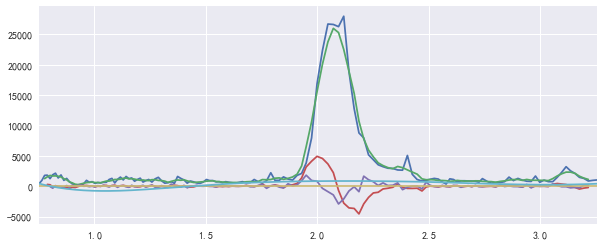

In [82]:
figure = plt.figure(figsize=(10,4))
pd.Series(intensity,index=rt).plot()
pd.Series(intensity,index=rt).rolling(5,center=True).mean().plot()
pd.Series(intensity,index=rt).rolling(5,center=True).mean().diff().plot()
pd.Series(intensity,index=rt).rolling(5,center=True).mean().diff().diff().plot()
plt.plot(rt[[0,-1]],(0,0))
plt.plot(rt,peakutils.baseline(intensity,4))

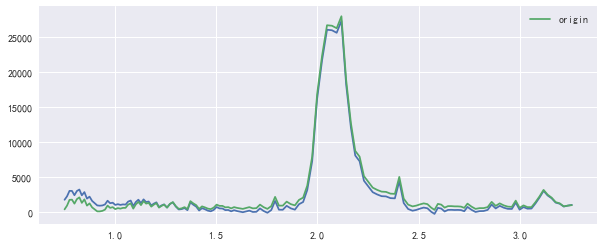

In [83]:
# 去基线
import peakutils
f = plt.figure(figsize=(10,4))
plt.plot(rt,intensity-peakutils.baseline(intensity,2))
plt.plot(rt,intensity,label='origin')
plt.legend()

In [60]:
def integrate_(chromatograph,deg=2):
    # 整条色谱积分
    
    rt = chromatograph['time array']
    intensity = chromatograph['intensity array']
    baseline = peakutils.baseline(intensity,deg=deg)
    y = intensity - baseline
    area = simps(y,rt)
    return area

In [67]:
#各色谱图积分
areas = [integrate_(c) for c in chromatograms[1:]]
Q3s = [c['Q3'] for c in chromatograms[1:]]

In [79]:
peak_areas = pd.Series(areas,index=Q3s)

In [ ]:
# 峰面积-内标校正


In [ ]:
# 峰面积-QC校正